# Model Trainer

## 1.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library 

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Import the CSV file as Pandas Dataframe

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df_test = pd.read_csv('data/test.csv')

### How Top 5 records

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preparing X and Y variables

In [6]:
X = df.drop(columns=['SalePrice'], axis=1)
y = df['SalePrice']

In [7]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Creating Column Transformers

In [8]:
# #Removing cat_features with more than 10 options
# cat_features = [
#     col for col in X.columns if
#     X[col].nunique() < 10 and
#     X[col].dtype == "object" 
# ]

# cat_features

In [9]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

num_transformer = make_pipeline(
    SimpleImputer(strategy='constant'),
    StandardScaler()
)

cat_transformer = make_pipeline(
    SimpleImputer(strategy="constant"),
    OneHotEncoder(handle_unknown="ignore")
)

In [10]:
preprocessor = make_column_transformer(
    (num_transformer, num_features),
    (cat_transformer, cat_features)
)

In [11]:
# X = preprocessor.fit_transform(X)

### Splitting Data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=10)
X_train.shape, X_valid.shape

((1168, 80), (292, 80))

### Evaluating the model trainer

In [16]:
def eval( y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training the model
    my_model = make_pipeline(
        preprocessor,
        model
    ) 

    my_model.fit(X_train, y_train)


    # making predictions
    y_train_pred = my_model.predict(X_train)
    y_valid_pred = my_model.predict(X_valid)

    # calling evaluation
    mse_train, mae_train, rmse_train,  r2_train = eval( y_train, y_train_pred)
    mse_valid, mae_valid, rmse_valid,  r2_valid = eval( y_valid, y_valid_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set:")
    print("- Mean Squared Error: {:.4f}".format(mse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print("--------------------------------------------")

    print("Model Performance for Validation set:")
    print("- Mean Squared Error: {:.4f}".format(mse_valid))
    print("- Mean Absolute Error: {:.4f}".format(mae_valid))
    print("- Root Mean Squared Error: {:.4f}".format(rmse_valid))
    print("- R2 Score: {:.4f}".format(r2_valid))

    r2_list.append(r2_valid)

    print('='*35)
    print('\n')


Linear Regression
Model Performance for Training set:
- Mean Squared Error: 403179064.9412
- Mean Absolute Error: 12716.4665
- Root Mean Squared Error: 20079.3193
- R2 Score: 0.9358
--------------------------------------------
Model Performance for Validation set:
- Mean Squared Error: 742948624.2428
- Mean Absolute Error: 18639.6357
- Root Mean Squared Error: 27257.0839
- R2 Score: 0.8839




c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54690794482.93686, tolerance: 733856567.5686355
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso
Model Performance for Training set:
- Mean Squared Error: 403412689.2398
- Mean Absolute Error: 12729.3779
- Root Mean Squared Error: 20085.1360
- R2 Score: 0.9358
--------------------------------------------
Model Performance for Validation set:
- Mean Squared Error: 656651461.3343
- Mean Absolute Error: 17945.5946
- Root Mean Squared Error: 25625.2114
- R2 Score: 0.8973


Ridge
Model Performance for Training set:
- Mean Squared Error: 486220827.0800
- Mean Absolute Error: 14176.1163
- Root Mean Squared Error: 22050.4156
- R2 Score: 0.9226
--------------------------------------------
Model Performance for Validation set:
- Mean Squared Error: 665436073.8549
- Mean Absolute Error: 18166.7917
- Root Mean Squared Error: 25796.0476
- R2 Score: 0.8960


K-Neighbors Regressor
Model Performance for Training set:
- Mean Squared Error: 1051086746.3769
- Mean Absolute Error: 18090.0151
- Root Mean Squared Error: 32420.4680
- R2 Score: 0.8327
--------------------------------------------
Mo

# Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Lasso,0.897350
2,Ridge,0.895976
0,Linear Regression,0.883859
5,Random Forest Regressor,0.872143
6,XGBRegressor,0.870662
7,AdaBoost Regressor,0.823478
3,K-Neighbors Regressor,0.818563
4,Decision Tree,0.749361


## Best Model and its accuracy

In [22]:
lasso = Lasso()
lasso_model = make_pipeline(
    preprocessor,
    lasso
)

lasso_model.fit(X_train, y_train)

y_lasso_pred = lasso_model.predict(X_valid)

print("Accuracy of the model is: {:.2f}".format(r2_score(y_valid,y_lasso_pred)*100))

Accuracy of the model is: 89.73


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54690794482.93686, tolerance: 733856567.5686355
  model = cd_fast.sparse_enet_coordinate_descent(


## Plot y_valid and y_lasso_pred

Text(0, 0.5, 'Predicted data')

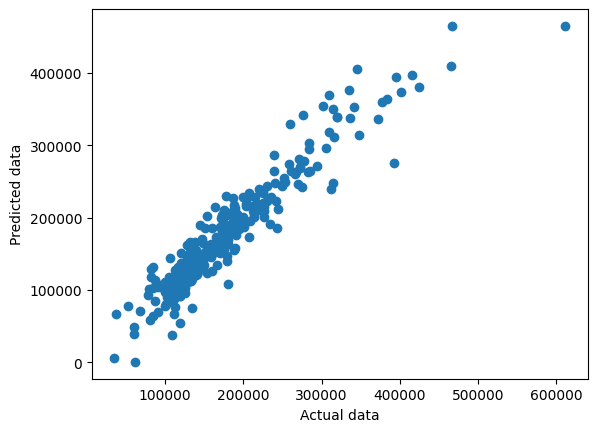

In [24]:
plt.scatter(y_valid, y_lasso_pred)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")

## Difference between Actual and Predicted Data

In [25]:
pd.DataFrame({'Actual Value':y_valid, 'Predicted Value':y_lasso_pred, 'Difference':y_valid-y_lasso_pred})

,Actual Value,Predicted Value,Difference
854,170000,187015.407096,-17015.407096
381,187750,203771.004440,-16021.004440
816,137000,129591.361615,7408.638385
577,164500,172789.399215,-8289.399215
35,309000,317653.021244,-8653.021244
...,...,...,...
970,135000,74933.863757,60066.136243
598,217500,210408.336748,7091.663252
1058,335000,375929.242407,-40929.242407
1018,160000,153795.957709,6204.042291


# Making Predicition on the submission data

In [ ]:
# predict = my_pipeline.predict(df_test)

In [ ]:
# output = pd.DataFrame({
#     'Id':df_test.Id,
#     'SalePrice': predict
# })

In [ ]:
# output.to_csv('submission.csv', index=False)